# 머신러닝

## 의사결정트리 평가

In [1]:
# 데이터 셋과 의사결정트리 기반 분류기 클래스
# Datasets : scikit learn 에서 제공하는 data set을 사용하기 위한 모듈
# DecisionTreeClassifier : decision tree 기계학습 모델을 사용하기 위한 모듈
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier

In [2]:
# 데이터셋 불리 방법 관련 모듈
# Train_test_split : 데이터 셋을 train set과 test set으로 분리할 수 있는 클래스를 제공하는 모듈
# StratifiedKFold : Stratified k fold cross validation을 사용하기 위한 모듈 Kfold 모듈과는 다르게 각 fold내 데이터의 클래스 비율을 일정하게 유지
# Cross_val_score : cross validation 결과의 정확도를 측정하기 위한 모듈
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [3]:
# 성능평가 관련 모듈
# Confusion_matrix : 분석 결과의 confusion matrix를 추출하기 위한 모듈
# Accuracy_score : 분석 결과의 accuracy를 측정하기 위한 모듈
# Classification_report : 분석 결과의 recall, precision, f-measure를 측정하기 위한 모듈
# Roc_auc_score : roc 곡선 아래 넓이를 구하기 위한 모듈
# Mean_squared_error : 분석 결과의 MSE를 구하기 위한 모듈
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error

In [4]:
data = datasets.load_breast_cancer()
X = data.data
y = data.target

In [5]:
# 데이터 셋을 train set과 test set으로 분리 (8:2)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [6]:
# decision tree로 모델 만들기
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [7]:
# X_test 를 예측한 값을 y_pred에 저장
y_pred = clf.predict(X_test)

In [8]:
# 실제값 y_test와 예측값 y_pred 비교
#           예측값
#           0   1
# 실제값 0
#        1
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix
[[33  2]
 [ 3 76]]


In [9]:
# 정확도 계산
print("Accuracy")
print(accuracy_score(y_test, y_pred, normalize=True))

Accuracy
0.956140350877193


In [10]:
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.94      0.93        35
           1       0.97      0.96      0.97        79

   micro avg       0.96      0.96      0.96       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [11]:
# roc 곡선 아래 면적 출력
print("AUC")
print(roc_auc_score(y_test, y_pred))

AUC
0.9524412296564195


In [12]:
print("Mean Squared Error")
print(mean_squared_error(y_test, y_pred))

Mean Squared Error
0.043859649122807015


In [13]:
# K = 10 인 fold로 나눠서 각자 학습시켜본다.
skf = StratifiedKFold(n_splits=10)
skf.get_n_splits(X,y)
print(skf)

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)


In [14]:
for train_index, test_index in skf.split(X,y):
    print('Train set: ', train_index)
    print('Test set : ', test_index)

Train set:  [ 25  26  27  28  29  30  31  32  33  34  35  36  38  39  40  41  42  43
  44  45  47  53  54  56  57  62  64  65  70  72  73  75  77  78  82  83
  85  86  87  91  94  95  99 100 102 103 104 105 106 107 108 109 110 111
 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129
 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147
 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165
 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183
 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201
 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219
 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237
 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255
 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273
 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291
 292 293 294 295 296 297 298 299 300 30

In [15]:
clf = DecisionTreeClassifier()
scores = cross_val_score(clf, X, y, cv=skf)
print('K Fold Cross Validation Score')
print(scores)
print("Average Accuracy")
print(scores.mean())

K Fold Cross Validation Score
[0.93103448 0.87931034 0.92982456 0.89473684 0.94736842 0.87719298
 0.89473684 0.94642857 0.92857143 0.98214286]
Average Accuracy
0.921134733385187


In [16]:
# 데이터셋을 섞어서 10개로 나눠 다시한번 진행
skf_sh = StratifiedKFold(n_splits=10, shuffle=True)
skf_sh.get_n_splits(X,y)
print(skf_sh)

StratifiedKFold(n_splits=10, random_state=None, shuffle=True)


In [17]:
for train_index, test_index in skf_sh.split(X,y):
    print('Train set: ', train_index)
    print('Test set : ', test_index)

Train set:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  65  66  67  68  69  70  71  72  75
  76  77  78  79  80  81  82  83  84  86  87  88  89  90  91  92  93  95
  96  98  99 100 101 102 103 104 105 107 108 109 110 111 112 113 114 115
 116 117 118 119 120 121 122 123 124 125 126 127 128 130 131 132 133 134
 137 138 139 140 141 142 143 144 145 146 147 148 149 151 152 153 155 156
 157 158 159 160 161 162 163 164 165 166 167 168 170 171 172 173 174 175
 176 177 178 179 180 181 182 183 184 185 186 187 188 190 191 192 193 194
 195 196 198 199 200 201 203 204 205 206 207 208 209 210 211 212 213 215
 216 217 218 219 221 222 223 224 225 226 227 228 229 231 232 233 234 235
 236 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254
 255 256 257 258 259 260 261 263 264 26

 561 562 563 564 565 566 567 568]
Test set :  [  7  14  23  26  33  37  40  54  55  78  92  93 100 107 108 113 118 125
 140 144 145 146 158 172 175 178 183 190 204 212 234 241 254 255 288 310
 319 322 325 354 358 361 365 366 376 381 395 397 406 410 418 421 458 466
 479 496 499]
Train set:  [  0   1   3   4   5   6   7   8  10  11  12  13  14  15  17  18  19  20
  21  22  23  24  25  26  27  28  29  30  32  33  34  35  36  37  38  39
  40  41  42  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58
  59  60  61  62  63  64  65  66  67  68  69  70  72  73  74  75  76  78
  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96
  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 115
 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 132 133 134
 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152
 153 154 156 157 158 160 162 164 165 166 167 168 169 170 171 172 173 174
 175 176 177 178 179 180 181 182 183 184 185 186 187

In [18]:
clf = DecisionTreeClassifier()
scores = cross_val_score(clf, X, y, cv=skf_sh)
print('K Fold Cross Validation Score')
print(scores)
print("Average Accuracy")
print(scores.mean())

K Fold Cross Validation Score
[0.96551724 0.94827586 0.96491228 0.94736842 0.92982456 0.94736842
 0.98245614 0.875      0.91071429 0.92857143]
Average Accuracy
0.9400008642295395


## 단일 선형회귀분석

### 직접하기

In [19]:
import pandas as pd
from pandas import DataFrame

In [20]:
x = [13,19,16,14,15,14]
y = [40,83,62,48,58,43]
data = pd.DataFrame(data=[x,y]).T
data.columns=['x','y']
data

,x,y
0,13,40
1,19,83
2,16,62
3,14,48
4,15,58
5,14,43


In [21]:
data['x^2'] = data['x']**2
data['x_i*y_i'] = data['x']*data['y']
data

,x,y,x^2,x_i*y_i
0,13,40,169,520
1,19,83,361,1577
2,16,62,256,992
3,14,48,196,672
4,15,58,225,870
5,14,43,196,602


In [22]:
sum_xy = data['x_i*y_i'].sum()
sum_x2 = data['x^2'].sum()

In [23]:
mean_x = data['x'].mean()
mean_y = data['y'].mean()

In [24]:
n = data.shape[0]
n

6

In [25]:
a = (sum_xy - n * mean_x * mean_y) / (sum_x2 - n * mean_x ** 2)
a

7.32846715328465

In [26]:
b = mean_y - a * mean_x
b

-55.48175182481719

In [27]:
x = data['x']
y = a * x + b

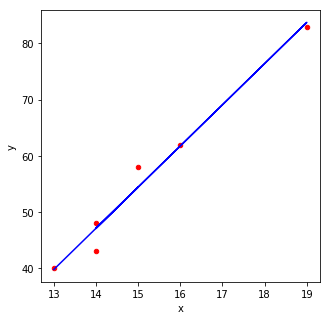

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
data.plot(kind='scatter',x='x', y='y',figsize=(5,5),color='red')
plt.plot(x,y,color='blue')

### 파이썬 이용해서 하기

In [29]:
from sklearn import linear_model
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

# ipython의 'magic function' 중 하나로, matplotlib의 시각화 결과를 Ipython notebook 안에서 출력하는 함수
%matplotlib inline

#matplotlib 패키지에서 제공하는 스타일중 ggplot 지정
matplotlib.style.use('ggplot')

In [30]:
# linear_model 모듈이 포함하고 있는 Linearregression() 함수를 'linear_regression'이라고 하는 변수에 할당
linear_regression = linear_model.LinearRegression()

# 선형회귀 모델 훈련 실행
linear_regression.fit(X= pd.DataFrame(data['x']), y = data['y'])

# 선형 회귀식의 세로축 절편 출력
print('b value = ', linear_regression.intercept_)

# 선형 회귀식의 기울기 출력
print('a value = ', linear_regression.coef_)

b value =  -55.48175182481753
a value =  [7.32846715]


In [31]:
# 선형회귀 모델을 적용해서 선형회귀값 구하기
prediction = linear_regression.predict(X = pd.DataFrame(data['x']))

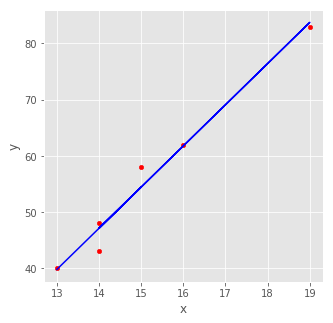

In [32]:
data.plot(kind='scatter',x='x', y='y',figsize=(5,5),color='red')
plt.plot(x,y,color='blue')

### 적합도

In [33]:
# 실제 y값과 예측한 y값의 차인 잔차(residuals) 구하기
residuals = data['y'] - prediction
print(residuals)

# 변수개수, 잔차의 평균값, 표준편차, 최소값, 25%, 50%, 75%값, 최대값
residuals.describe()

0    0.211679
1   -0.759124
2    0.226277
3    0.883212
4    3.554745
5   -4.116788
Name: y, dtype: float64


count    6.000000e+00
mean     5.921189e-15
std      2.491445e+00
min     -4.116788e+00
25%     -5.164234e-01
50%      2.189781e-01
75%      7.189781e-01
max      3.554745e+00
Name: y, dtype: float64

In [34]:
# 잔차를 제곱하여 합한 SSE
SSE = (residuals**2).sum()
print('SSE = ', SSE)

# y값의 편차의 제곱한 것을 모두 합한 SST
SST = ((data['y'] - data['y'].mean())**2).sum()
print('SST = ', SST)

# 결정계수 R
R_squared = 1 - (SSE/SST)
print('R_squared = ', R_squared)

SSE =  31.03649635036502
SST =  1257.3333333333333
R_squared =  0.9753156179610034


### 적합도 직접검증

In [35]:
data['y_pred'] = a * x + b
data

,x,y,x^2,x_i*y_i,y_pred
0,13,40,169,520,39.788321
1,19,83,361,1577,83.759124
2,16,62,256,992,61.773723
3,14,48,196,672,47.116788
4,15,58,225,870,54.445255
5,14,43,196,602,47.116788


In [36]:
data['y - y_pred'] = data['y'] - data['y_pred']
data['pow(y - y_pred)'] = data['y - y_pred'] ** 2
data

,x,y,x^2,x_i*y_i,y_pred,y - y_pred,pow(y - y_pred)
0,13,40,169,520,39.788321,0.211679,0.044808
1,19,83,361,1577,83.759124,-0.759124,0.576269
2,16,62,256,992,61.773723,0.226277,0.051201
3,14,48,196,672,47.116788,0.883212,0.780063
4,15,58,225,870,54.445255,3.554745,12.636209
5,14,43,196,602,47.116788,-4.116788,16.947946


In [37]:
mean_y = data['y'].mean()

In [38]:
data['y - y_bar'] = data['y'] - mean_y
data['pow(y - y_bar)'] = data['y - y_bar'] **2
data

,x,y,x^2,x_i*y_i,y_pred,y - y_pred,pow(y - y_pred),y - y_bar,pow(y - y_bar)
0,13,40,169,520,39.788321,0.211679,0.044808,-15.666667,245.444444
1,19,83,361,1577,83.759124,-0.759124,0.576269,27.333333,747.111111
2,16,62,256,992,61.773723,0.226277,0.051201,6.333333,40.111111
3,14,48,196,672,47.116788,0.883212,0.780063,-7.666667,58.777778
4,15,58,225,870,54.445255,3.554745,12.636209,2.333333,5.444444
5,14,43,196,602,47.116788,-4.116788,16.947946,-12.666667,160.444444


In [39]:
SST = data['pow(y - y_bar)'].sum()
SSE = data['pow(y - y_pred)'].sum()

In [40]:
SSR = SST - SSE

In [41]:
R2 = SSR/SST
R2

0.9753156179610034

### 성능검사

In [42]:
from sklearn.metrics import mean_squared_error

# 결정계수 구하기
print('score = ', linear_regression.score(X = pd.DataFrame(data['x']), y = data['y']))

# 잔차의 제곱의 합 (SSE)
print('Mean_Squared_Error = ' , mean_squared_error(prediction, data['y']))

# 제곱근
print('RMSE = ', mean_squared_error(prediction, data['y'])**0.5)

score =  0.9753156179610034
Mean_Squared_Error =  5.172749391727503
RMSE =  2.2743679103714736


## 다중 선형회귀분석

In [43]:
from sklearn import linear_model
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

In [44]:
data = pd.DataFrame({'x1' : [13, 18, 17, 20, 22, 21],
                    'x2' : [9, 7, 17, 11, 8, 10],
                    'y' : [20, 22, 30, 27, 35, 32]})
X = data[['x1', 'x2']]
y = data['y']
data

,x1,x2,y
0,13,9,20
1,18,7,22
2,17,17,30
3,20,11,27
4,22,8,35
5,21,10,32


In [45]:
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X = pd.DataFrame(X), y = y)
prediction = linear_regression.predict(X = pd.DataFrame(X))
print('a value = ', linear_regression.intercept_)
print('b value = ', linear_regression.coef_)

a value =  -7.35920177383591
b value =  [1.5443459  0.62472284]


In [46]:
residuals = y - prediction
residuals.describe()

count    6.000000e+00
mean    -4.144833e-15
std      2.622371e+00
min     -3.399667e+00
25%     -1.987805e+00
50%      5.828714e-01
75%      1.415327e+00
max      3.385809e+00
Name: y, dtype: float64

In [47]:
# 적합도 검증
SSE = (residuals**2).sum()
SST = ((y-y.mean())**2).sum()
R_squared = 1 - (SSE/SST)
print('R_squared = ', R_squared)

R_squared =  0.7969440176685232


In [48]:
new_car = pd.DataFrame({'x1' : [25],
                       'x2' : [15]})

In [49]:
new_sale = linear_regression.predict(X = new_car)
new_sale

array([40.62028825])

In [50]:
(new_car.values[0] * linear_regression.coef_).sum() + linear_regression.intercept_

40.62028824833703

## 다중 선형회귀분석2

In [51]:
import pandas as pd
from sklearn import linear_model
from sklearn import datasets
boston_house_prices = datasets.load_boston()
print(boston_house_prices.keys())
print(boston_house_prices.data.shape)
print(boston_house_prices.feature_names)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [52]:
print(boston_house_prices.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [53]:
X = pd.DataFrame(boston_house_prices.data)
X.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


In [54]:
X.columns = boston_house_prices.feature_names
X.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


In [55]:
y = pd.Series(boston_house_prices.target)
X.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


In [56]:
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X = pd.DataFrame(X), y = y)
prediction = linear_regression.predict(X = pd.DataFrame(X))
print('a value = ', linear_regression.intercept_)
print('b value = ', linear_regression.coef_)

a value =  36.459488385089855
b value =  [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]


In [57]:
residuals = y-prediction
residuals.describe()

count    5.060000e+02
mean     2.924319e-15
std      4.683822e+00
min     -1.559447e+01
25%     -2.729716e+00
50%     -5.180489e-01
75%      1.777051e+00
max      2.619927e+01
dtype: float64

In [58]:
SSE = (residuals**2).sum()
SST = ((y-y.mean())**2).sum()
R_squared = 1 - (SSE/SST)
print('R_squared = ', R_squared)

R_squared =  0.7406426641094094


In [59]:
from sklearn.metrics import mean_squared_error
print('score = ', linear_regression.score(X = pd.DataFrame(X), y = y))
print('Mean_Squared_Error = ', mean_squared_error(prediction, y))
print('RMSE = ', mean_squared_error(prediction, y)**0.5)

score =  0.7406426641094095
Mean_Squared_Error =  21.894831181729202
RMSE =  4.679191295697281


In [60]:
data

,x1,x2,y
0,13,9,20
1,18,7,22
2,17,17,30
3,20,11,27
4,22,8,35
5,21,10,32


In [61]:
n = X.shape[0]
k = X.shape[1]

In [62]:
Adj_R_Squared = 1-(1-R_squared)*((n - 1) / (n - k -1))
Adj_R_Squared

0.7337897263724629

## 상관계수

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [64]:
data = pd.read_csv("2015_data.csv", encoding = "cp949")
data

,Location,Date,SO2,CO,O3,NO2,PM10,PM25
0,강원,2015-01-01,0.006,0.623,0.019,0.012,73.621,10.937
1,강원,2015-01-02,0.008,0.871,0.017,0.018,40.302,14.740
2,강원,2015-01-03,0.008,1.050,0.013,0.024,47.844,25.083
3,강원,2015-01-04,0.011,1.371,0.010,0.029,63.758,42.063
4,강원,2015-01-05,0.011,1.567,0.009,0.031,93.979,64.552
5,강원,2015-01-06,0.007,1.031,0.020,0.020,55.385,30.198
6,강원,2015-01-07,0.007,0.951,0.017,0.022,43.784,16.193
7,강원,2015-01-08,0.008,1.025,0.011,0.029,61.226,31.978
8,강원,2015-01-09,0.009,1.143,0.011,0.032,69.260,41.438
9,강원,2015-01-10,0.009,1.065,0.014,0.028,60.198,36.448


In [65]:
data["Location"].isin(["서울"])

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
5431    False
5432    False
5433    False
5434    False
5435    False
5436    False
5437    False
5438    False
5439    False
5440    False
5441    False
5442    False
5443    False
5444    False
5445    False
5446    False
5447    False
5448    False
5449    False
5450    False
5451    False
5452    False
5453    False
5454    False
5455    False
5456    False
5457    False
5458    False
5459    False
5460    False
Name: Location, Length: 5461, dtype: bool

In [66]:
data_seoul = data[data["Location"].isin(["서울"])]

In [67]:
data_seoul.corr()

,SO2,CO,O3,NO2,PM10,PM25
SO2,1.000000,0.643323,-0.185885,0.642349,0.377125,0.602491
CO,0.643323,1.000000,-0.597343,0.832596,0.380044,0.732430
O3,-0.185885,-0.597343,1.000000,-0.523796,-0.065889,-0.123384
NO2,0.642349,0.832596,-0.523796,1.000000,0.295676,0.601958
PM10,0.377125,0.380044,-0.065889,0.295676,1.000000,0.671326
PM25,0.602491,0.732430,-0.123384,0.601958,0.671326,1.000000


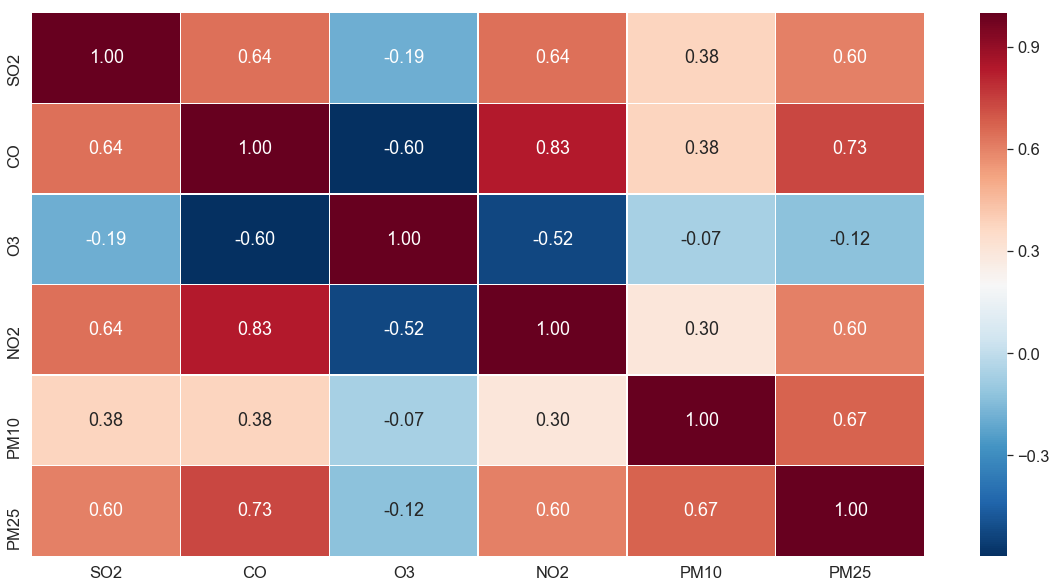

In [68]:
import seaborn as sns
%matplotlib inline

sns.set(font_scale = 1.5)
f, ax = plt.subplots(figsize=(20,10))

sns_heatmap = sns.heatmap(data_seoul.corr(), annot=True, fmt=".2f", linewidths=.5, cmap="RdBu_r")

## 다중공선성

In [69]:
from sklearn import linear_model
import numpy as np
import pandas as pd

data = pd.DataFrame({'x1': [1,4,5,8,10],
                     'x2': [3,5,7,9,10],
                     'x3': [7,8,5,7,4],
                     'y': [30,40,45,60,61]})

In [70]:
# LinearRegression()을 사용해 선형회귀모델을 받는다
# .fit을 통해서 X값과 y값을 통해 모델을 학습시킨다
linear_regresstion = linear_model.LinearRegression()
linear_regresstion.fit(X = pd.DataFrame(data[['x1' , 'x2' , 'x3']]) , y = data['y'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [71]:
# score를 통해 R_squared를 구함
linear_regresstion.score(X = pd.DataFrame(data[['x1', 'x2', 'x3']]), y = data['y'])

0.9952763020975958

In [72]:
# predict를 통해 y값을 예측함
prediction = linear_regresstion.predict(X = pd.DataFrame(data[['x1','x2','x3']]))
prediction

array([28.98387097, 41.06451613, 45.82258065, 59.32258065, 60.80645161])

In [73]:
# y예측값과 진짜 y값을 뺸 잔차를 구해준다.
residual = prediction - data['y']
residual

0   -1.016129
1    1.064516
2    0.822581
3   -0.677419
4   -0.193548
Name: y, dtype: float64

In [74]:
# 잔차 제곱의 평균을 계산
MSE = (residual*residual).sum() / 5
MSE

0.6677419354838687

In [75]:
# 제곱근 잔차 제곱의 편균을 계산
RMSE = ((residual*residual).sum()/5)**0.5
RMSE

0.8171547806161747

In [76]:
# x1이 종속성이 의심된다면 x2 와 x3를 X로 y값을 x1을 준다
# a의 값과 b의 값을 구해준다
linear_regresstion.fit(X = pd.DataFrame(data[['x2','x3']]) , y = data['x1'])

print('a value= ', linear_regresstion.intercept_)
print('b value= ', linear_regresstion.coef_)

a value=  -3.4623255813953495
b value=  [1.2427907  0.09860465]


In [77]:
# x1 예측에 대한 r_squared를 구한다
r_squared = linear_regresstion.score(X = pd.DataFrame(data[['x2' , 'x3']]) , y = data['x1'])
r_squared

0.9730383815466063

In [78]:
# LinearRegresstion을 편하게 사용하기 위해 import
# 매게 변수로 X값과 y 값을 받아 r_squared 구하고 VIF를 return 한다
# VIF가 10보다 크다면 문제가 있기 때문에 해당 칼럼을 삭제한다
from sklearn.linear_model import LinearRegression
def sklearn_VIF(x , y):
    r_squared_ = LinearRegression().fit(x , y).score(x , y)
    return 1 / (1 - r_squared_)

In [79]:
sklearn_VIF(data[['x2','x3']] , data['x1'])

37.08976157082763

In [80]:
sklearn_VIF(data[['x1','x3']] , data['x2'])

39.83842917251046

In [81]:
sklearn_VIF(data[['x1','x2']] , data['x3'])

1.7267882187938297

In [82]:
new_data = data[['x1', 'x3' , 'y']]

new_data

,x1,x3,y
0,1,7,30
1,4,8,40
2,5,5,45
3,8,7,60
4,10,4,61


In [83]:
sklearn_VIF(data[['x1']] , data['x3'])

1.5339491916859125

In [84]:
sklearn_VIF(data[['x3']] , data['x1'])

1.5339491916859123

In [85]:
linear_regresstion = linear_model.LinearRegression()
linear_regresstion.fit(X = pd.DataFrame(data[['x1', 'x3']]) , y = data['y'])

prediction = linear_regresstion.predict(X = pd.DataFrame(data[['x1','x3']]))
prediction

array([29.61778291, 42.48845266, 43.70323326, 57.4965358 , 62.69399538])

In [86]:
residual = prediction - data['y']
residual

0   -0.382217
1    2.488453
2   -1.296767
3   -2.503464
4    1.693995
Name: y, dtype: float64

In [87]:
MSE = (residual*residual).sum() / 5
MSE

3.4314087759815246

In [88]:
RMSE = ((residual*residual).sum()/5)**0.5
RMSE

1.8524062124657013

## 미국 경제 데이터를 이용한 다중 공선성 예제

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
import seaborn as sns

In [90]:
from statsmodels.datasets.longley import load_pandas
# gnp deflator(실질 gnp), GNP, 실업자수,군대, 인구
dfX = load_pandas().exog
# 고용자 수
dfy = load_pandas().endog
# 데이터프레임 만들기
df = pd.concat([dfX,dfy],axis = 1)

In [91]:
# 공분산으로 상관관계를 확인. 공선성이 되는 값을 없에야 되기 때문에
df.corr()

,GNPDEFL,GNP,UNEMP,ARMED,POP,YEAR,TOTEMP
GNPDEFL,1.000000,0.991589,0.620633,0.464744,0.979163,0.991149,0.970899
GNP,0.991589,1.000000,0.604261,0.446437,0.991090,0.995273,0.983552
UNEMP,0.620633,0.604261,1.000000,-0.177421,0.686552,0.668257,0.502498
ARMED,0.464744,0.446437,-0.177421,1.000000,0.364416,0.417245,0.457307
POP,0.979163,0.991090,0.686552,0.364416,1.000000,0.993953,0.960391
YEAR,0.991149,0.995273,0.668257,0.417245,0.993953,1.000000,0.971329
TOTEMP,0.970899,0.983552,0.502498,0.457307,0.960391,0.971329,1.000000


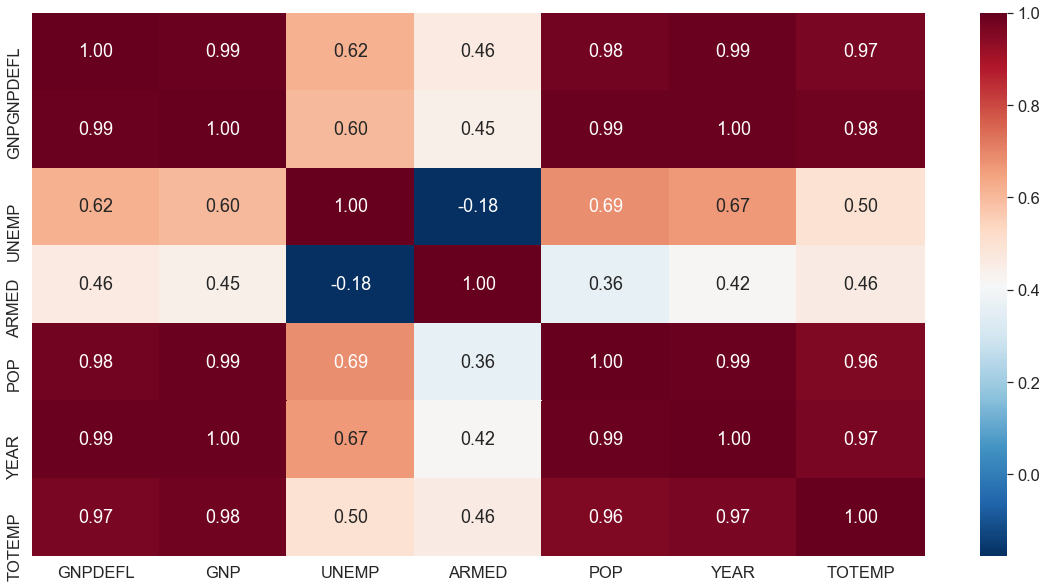

In [92]:
# 그림으로 보기
sns.set(font_scale=1.5)
f , ax = plt.subplots(figsize = (20,10))
sns.heatmap(df.corr(), annot = True, fmt = ".2f", cmap = "RdBu_r")

In [93]:
# 데이터의 범주가 여러가지이기 때문에 맞춰줘야한다. 즉 스케일러를 사용
y = df['TOTEMP']
X = df.drop(["TOTEMP" , "YEAR"] , axis = 1)
X.head()

,GNPDEFL,GNP,UNEMP,ARMED,POP
0,83.0,234289.0,2356.0,1590.0,107608.0
1,88.5,259426.0,2325.0,1456.0,108632.0
2,88.2,258054.0,3682.0,1616.0,109773.0
3,89.5,284599.0,3351.0,1650.0,110929.0
4,96.2,328975.0,2099.0,3099.0,112075.0


In [94]:
# 범주를 같게 해주기위해서 Scaler사용
# 최대값 = 1, 최솟값 = 0 으로 하여 그사이에 값들이 있도록 하는 방법
from sklearn.preprocessing import MinMaxScaler
# 데이터의 범위를 일정하게 만들어주는 객체
scaler = MinMaxScaler()
# 각 컬럼의 평균 표준편차 계산
scaler.fit(X)
# (데이터 - 최소값) / (최대값 - 최소값) 를 계산해서 각 컬럼의 데이터 범위를 0-1 사이로 일정하게 맞춰서 X_scaled에 대입
X_scaled = scaler.transform(X)
X_scaled

array([[0.        , 0.        , 0.16553134, 0.0626754 , 0.        ],
       [0.16224189, 0.07840489, 0.15497275, 0.        , 0.04556579],
       [0.15339233, 0.07412548, 0.61716621, 0.0748363 , 0.09633783],
       [0.19174041, 0.15692207, 0.50442779, 0.09073901, 0.14777733],
       [0.38938053, 0.29533538, 0.07799728, 0.76847521, 0.19877186],
       [0.44542773, 0.35155409, 0.02111717, 1.        , 0.25194678],
       [0.4719764 , 0.40890192, 0.        , 0.97801684, 0.33311084],
       [0.50147493, 0.4018122 , 0.58174387, 0.88587465, 0.38317092],
       [0.53687316, 0.50897522, 0.35217984, 0.74462114, 0.43518889],
       [0.63716814, 0.57669406, 0.32425068, 0.65528531, 0.49508299],
       [0.74926254, 0.65027058, 0.36307902, 0.62768943, 0.5712188 ],
       [0.820059  , 0.65581323, 0.95742507, 0.55238541, 0.63818805],
       [0.87315634, 0.77483196, 0.66178474, 0.51262862, 0.70119699],
       [0.92035398, 0.83689275, 0.70197548, 0.494855  , 0.79028167],
       [0.96460177, 0.88546342, 1.

In [95]:
X = pd.DataFrame(X_scaled, columns = X.columns)
X

,GNPDEFL,GNP,UNEMP,ARMED,POP
0,0.000000,0.000000,0.165531,0.062675,0.000000
1,0.162242,0.078405,0.154973,0.000000,0.045566
2,0.153392,0.074125,0.617166,0.074836,0.096338
3,0.191740,0.156922,0.504428,0.090739,0.147777
4,0.389381,0.295335,0.077997,0.768475,0.198772
5,0.445428,0.351554,0.021117,1.000000,0.251947
6,0.471976,0.408902,0.000000,0.978017,0.333111
7,0.501475,0.401812,0.581744,0.885875,0.383171
8,0.536873,0.508975,0.352180,0.744621,0.435189
9,0.637168,0.576694,0.324251,0.655285,0.495083


In [96]:
from sklearn.linear_model import LinearRegression
# 선형 회귀 객체 생성
reg = LinearRegression()
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [97]:
# Weight
print(reg.coef_)
# Bias
print(reg.intercept_)

[-1642.88987543 23084.79411175 -1185.7654284  -1198.33955478
 -9068.05060078]
60316.520285629886


In [98]:
print(f"the linear model is : Y = {reg.intercept_} + {reg.coef_[0]}*GNPDEFL + {reg.coef_[1]}*GNP + {reg.coef_[2]}*UNEMP+{reg.coef_[3]}*ARMED+{reg.coef_[4]}*POP")

the linear model is : Y = 60316.520285629886 + -1642.889875430809*GNPDEFL + 23084.794111748724*GNP + -1185.7654284028133*UNEMP+-1198.3395547765765*ARMED+-9068.050600778124*POP


In [99]:
predictions = reg.predict(X)
predictions

array([60045.13254307, 61262.98126938, 60080.59511106, 61577.10404942,
       63678.7134359 , 64192.23972166, 64787.86941276, 63542.40042971,
       65927.85839769, 66923.40975212, 67734.37439117, 66524.21866929,
       69011.34237133, 69532.28010289, 69192.6183171 , 71058.86202547])

In [100]:
residuals = y-predictions
residuals.describe()

count    1.600000e+01
mean     3.637979e-12
std      3.945662e+02
min     -5.532397e+02
25%     -3.647828e+02
50%      6.106239e+01
75%      2.054978e+02
max      9.335902e+02
Name: TOTEMP, dtype: float64

In [101]:
SSE = (residuals**2).sum()
SST = ((y-y.mean())**2).sum()
R_squared = 1 - (SSE / SST)
R_squared

0.9873776967532714

In [102]:
# 다중공선성을 계산하는 함수 구현
# exog : 데이터 프레임
# exog_idx : 다중 공선성을 계산하고자 하는 컬럼의 인덱스

def variance_inflation_factor(exog, exog_idx):
    # X의 열개수
    k_vars = exog.values.shape[1]
    # 하나의 column의 행series x_i
    x_i = exog.iloc[:, exog_idx]
    # 정한 하나의 series 빼고 전부 x_noti
    mask = np.arange(k_vars) != exog_idx
    x_noti = exog.iloc[:, mask]
    
    # x_i 를 y, x_noti를 x 로해서 선형회귀 해서 R_square를 구해봄
    r_squared_i = LinearRegression().fit(X=pd.DataFrame(x_noti), y=pd.Series(x_i)).score(X=pd.DataFrame(x_noti), y=pd.Series(x_i))
    vif = 1. / (1. - r_squared_i)
    return vif

In [103]:
# 다중 공선성을 계산해서 저장할 DataFrame생성
vif = pd.DataFrame()
# VIF Factor 컬럼 추가
vif["VIF Factor"] = [variance_inflation_factor(X, i) for i in range(X.values.shape[1])]
# X 의 컬럼명을 features컬럼에 대입
vif["features"] = X.columns
vif

,VIF Factor,features
0,130.829201,GNPDEFL
1,639.049777,GNP
2,10.786858,UNEMP
3,2.505775,ARMED
4,339.011693,POP


In [104]:
# 다중 공선성 지수가 가장 높은 GNP를 삭제
X = X.drop(['GNP'], axis = 1)
X.head()

,GNPDEFL,UNEMP,ARMED,POP
0,0.000000,0.165531,0.062675,0.000000
1,0.162242,0.154973,0.000000,0.045566
2,0.153392,0.617166,0.074836,0.096338
3,0.191740,0.504428,0.090739,0.147777
4,0.389381,0.077997,0.768475,0.198772


In [105]:
# 다시 실행
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X, i) for i in range(X.values.shape[1])]
vif["features"] = X.columns
vif

,VIF Factor,features
0,35.970754,GNPDEFL
1,3.147600,UNEMP
2,2.497795,ARMED
3,34.588299,POP


In [106]:
X = X.drop(['GNPDEFL'], axis = 1)
X.head()

,UNEMP,ARMED,POP
0,0.165531,0.062675,0.000000
1,0.154973,0.000000,0.045566
2,0.617166,0.074836,0.096338
3,0.504428,0.090739,0.147777
4,0.077997,0.768475,0.198772


In [107]:
# 또다시 실행
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X, i) for i in range(X.values.shape[1])]
vif["features"] = X.columns
vif

,VIF Factor,features
0,3.146686,UNEMP
1,1.918225,ARMED
2,3.514335,POP


In [108]:
reg = LinearRegression()
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [109]:
predictions=reg.predict(X)
predictions

array([60598.5496127 , 61281.689816  , 60273.87579533, 61373.84752219,
       63331.98715502, 64166.70776104, 65355.60064989, 63974.24109266,
       65567.29269524, 66518.76815899, 67425.21528931, 66221.51689448,
       68161.42309742, 69235.07580447, 69651.74661309, 71934.4620422 ])

In [110]:
residuals = y - predictions
residuals.describe()

count    1.600000e+01
mean     1.818989e-12
std      6.120633e+02
min     -1.383462e+03
25%     -2.868489e+02
50%     -1.353385e+02
75%      3.596200e+02
max      1.338232e+03
Name: TOTEMP, dtype: float64

In [111]:
SSE = (residuals**2).sum()
SST = ((y-y.mean())**2).sum()
R_square = 1- (SSE / SST)
R_square

0.9696267343200499

In [112]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor


## PCA

#### PCA 직접 실습

In [154]:
import pandas as pd
import numpy as np

In [155]:
data = {"x1" : [10,20],
       "x2" : [2,3]}

In [156]:
df = pd.DataFrame(data)
df

,x1,x2
0,10,2
1,20,3


In [157]:
df.T.dot(df)

,x1,x2
x1,500,80
x2,80,13


In [158]:
np.cov(df.T)

array([[50. ,  5. ],
       [ 5. ,  0.5]])

In [159]:
df.mean()

x1    15.0
x2     2.5
dtype: float64

In [160]:
df = df - df.mean()
df

,x1,x2
0,-5.0,-0.5
1,5.0,0.5


In [161]:
np.cov(df)

array([[ 10.125, -10.125],
       [-10.125,  10.125]])

#### PCA 직접실습2

In [180]:
data = {
    "calory" : [1.2, 2.8, 5, 3, 4.5, 2],
    "breakfast" : [0, 3, 5, 2, 7, 5],
    "lunch" : [4, 5, 7, 6, 7, 3],
    "dinner" : [5, 6, 7, 6, 7, 6],
    "weight" : [65, 75, 100, 71, 97, 60]
}

In [181]:
df=pd.DataFrame(data)
df

,calory,breakfast,lunch,dinner,weight
0,1.2,0,4,5,65
1,2.8,3,5,6,75
2,5.0,5,7,7,100
3,3.0,2,6,6,71
4,4.5,7,7,7,97
5,2.0,5,3,6,60


In [182]:
y = df["weight"]
y

0     65
1     75
2    100
3     71
4     97
5     60
Name: weight, dtype: int64

In [183]:
df = df.drop(["weight"], axis=1)
df

,calory,breakfast,lunch,dinner
0,1.2,0,4,5
1,2.8,3,5,6
2,5.0,5,7,7
3,3.0,2,6,6
4,4.5,7,7,7
5,2.0,5,3,6


In [184]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()

linear_regression.fit(X = df, y = y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [185]:
linear_regression.score(X = df, y = y)

0.9994269340974212

In [186]:
from sklearn.preprocessing import StandardScaler
x.mean()

15.166666666666666

In [187]:
X_cen = df - df.mean()
X_cen

,calory,breakfast,lunch,dinner
0,-1.883333,-3.666667,-1.333333,-1.166667
1,-0.283333,-0.666667,-0.333333,-0.166667
2,1.916667,1.333333,1.666667,0.833333
3,-0.083333,-1.666667,0.666667,-0.166667
4,1.416667,3.333333,1.666667,0.833333
5,-1.083333,1.333333,-2.333333,-0.166667


In [188]:
X_cen.mean()

calory      -1.480297e-16
breakfast    1.480297e-16
lunch        2.960595e-16
dinner      -2.960595e-16
dtype: float64

In [189]:
X_cov = np.cov(X_cen.T)
X_cov

array([[2.09766667, 2.61333333, 2.12666667, 1.04333333],
       [2.61333333, 6.26666667, 1.73333333, 1.66666667],
       [2.12666667, 1.73333333, 2.66666667, 0.93333333],
       [1.04333333, 1.66666667, 0.93333333, 0.56666667]])

In [190]:
eigenvalue, eigenvector = np.linalg.eig(X_cov)
print("eigenvalue :", eigenvalue)
print("eigenvector :\n", eigenvector)

eigenvalue : [9.14780875e+00 2.36702072e+00 8.08883672e-02 1.94882794e-03]
eigenvector :
 [[ 0.43937091  0.34911627 -0.7283658  -0.39313393]
 [ 0.77295605 -0.58010996  0.23904478 -0.09417519]
 [ 0.3862551   0.73448569  0.55523568  0.05523686]
 [ 0.24555883  0.04605465 -0.32257433  0.91297625]]


In [191]:
sum(eigenvalue)

11.597666666666672

In [192]:
(eigenvalue[0]) / sum(eigenvalue)

0.7887628619676975

In [196]:
eigenvector

array([[ 0.43937091,  0.34911627, -0.7283658 , -0.39313393],
       [ 0.77295605, -0.58010996,  0.23904478, -0.09417519],
       [ 0.3862551 ,  0.73448569,  0.55523568,  0.05523686],
       [ 0.24555883,  0.04605465, -0.32257433,  0.91297625]])

In [194]:
projected_X = X_cov.dot(eigenvector.T[0])
projected_X

array([4.0192811 , 7.07085414, 3.53338781, 2.24632517])

In [195]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()

linear_regression.fit(X = pd.DataFrame(projected_X), y = y)

ValueError: Found input variables with inconsistent numbers of samples: [4, 6]

### PCA

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = {
    "x1" : [0.2, 0.45, 0.33, 0.54, 0.77],
    "x2" : [5.6, 5.87, 6.37, 7.9, 7.87],
    "x3" : [3.56, 2.4, 1.95, 1.32, 0.98],
    "y" : [100, 70, 60, 45, 30]
}

In [3]:
df = pd.DataFrame(data)
df

,x1,x2,x3,y
0,0.20,5.60,3.56,100
1,0.45,5.87,2.40,70
2,0.33,6.37,1.95,60
3,0.54,7.90,1.32,45
4,0.77,7.87,0.98,30


In [4]:
X = df[["x1","x2","x3"]]
X

,x1,x2,x3
0,0.20,5.60,3.56
1,0.45,5.87,2.40
2,0.33,6.37,1.95
3,0.54,7.90,1.32
4,0.77,7.87,0.98


In [5]:
X.mean()

x1    0.458
x2    6.722
x3    2.042
dtype: float64

In [6]:
X.std()

x1    0.216264
x2    1.097073
x3    1.011197
dtype: float64

In [7]:
X = (X - X.mean())
X

,x1,x2,x3
0,-0.258,-1.122,1.518
1,-0.008,-0.852,0.358
2,-0.128,-0.352,-0.092
3,0.082,1.178,-0.722
4,0.312,1.148,-1.062


In [8]:
X = (X/X.std())
X

,x1,x2,x3
0,-1.192988,-1.022721,1.501191
1,-0.036992,-0.776612,0.354036
2,-0.591870,-0.320854,-0.090981
3,0.379167,1.073766,-0.714005
4,1.442683,1.046420,-1.050240


In [9]:
print(X.mean())
print(X.std())

x1    0.000000e+00
x2    4.884981e-16
x3   -2.664535e-16
dtype: float64
x1    1.0
x2    1.0
x3    1.0
dtype: float64


In [10]:
X_cov = np.dot(X.T, X) / 15
print(X_cov)

[[ 0.26666667  0.22370099 -0.23573601]
 [ 0.22370099  0.26666667 -0.24311486]
 [-0.23573601 -0.24311486  0.26666667]]


In [12]:
eigenvalue, eigenvector = np.linalg.eig(X_cov)

print('고유값: ', eigenvalue)
print('고유벡터: ', eigenvector)

고유값:  [0.73512513 0.04377061 0.02110426]
고유벡터:  [[ 0.56993665  0.7754158   0.27185024]
 [ 0.57618187 -0.61301734  0.54057764]
 [-0.58582135  0.15145983  0.79616158]]


In [13]:
sum(eigenvalue)

0.7999999999999996

In [14]:
eigenvalue[0]/sum(eigenvalue)

0.9189064087143994

In [15]:
z1 = X.dot(eigenvector.T[0])
z1

0   -2.148630
1   -0.675954
2   -0.468900
3    1.253065
4    2.040419
dtype: float64

In [17]:
from sklearn import linear_model

linear_regression = linear_model.LinearRegression()

linear_regression.fit(X = X, y = df["y"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [18]:
linear_regression.score(X = X, y = df["y"])

0.9978441052442628

In [19]:
linear_regression.fit(X = pd.DataFrame(z1), y = df["y"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [20]:
linear_regression.score(X = pd.DataFrame(z1), y = df["y"])

0.959290206663969

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)

In [22]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [25]:
print('고유값 : ', pca.singular_values_)
print('고유값 벡터 : \n', pca.components_.T)

고유값 :  [3.32067416 0.81028337 0.56264017]
고유값 벡터 : 
 [[-0.56993665  0.7754158  -0.27185024]
 [-0.57618187 -0.61301734 -0.54057764]
 [ 0.58582135  0.15145983 -0.79616158]]


In [27]:
z = pca.fit_transform(X)
z

array([[ 2.14863038, -0.07074582, -0.31801621],
       [ 0.6759543 ,  0.50101454,  0.1480055 ],
       [ 0.46889967, -0.27603645,  0.40678208],
       [-1.25306486, -0.47236838, -0.115067  ],
       [-2.04041949,  0.31813611, -0.12170436]])

In [28]:
z1 = z.T[0]
z1

array([ 2.14863038,  0.6759543 ,  0.46889967, -1.25306486, -2.04041949])

In [29]:
linear_regression.fit(X = pd.DataFrame(z1), y = df["y"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [30]:
linear_regression.score(X = pd.DataFrame(z.T[0]), y = df["y"])

0.9592902066639692

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [32]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

boston = pd.DataFrame(boston_dataset.data, columns = boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [33]:
y = boston_dataset.target
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(boston)

X = scaler.transform(boston)
X

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [36]:
X = pd.DataFrame(X, columns = boston_dataset.feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [37]:
from sklearn.decomposition import PCA
pca = PCA(n_components=13)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=13, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [38]:
print(pca.singular_values_)
print(pca.components_.T)

[55.6793095  26.93022859 25.07516773 20.83105866 20.55278239 18.23864114
 16.45874174 14.15716218 11.83779223 10.55653065  9.70171478  9.25566343
  5.66883461]
[[ 0.2509514  -0.31525237  0.24656649  0.06177071  0.08215692 -0.21965961
   0.77760721  0.15335048  0.26039028  0.01936913 -0.10964435  0.08676107
   0.0459523 ]
 [-0.25631454 -0.3233129   0.29585782  0.12871159  0.32061699 -0.3233881
  -0.27499628 -0.40268031  0.35813749  0.26752723  0.26275629 -0.07142528
  -0.08091897]
 [ 0.34667207  0.11249291 -0.01594592  0.01714571 -0.00781119 -0.0761379
  -0.33957645  0.17393172  0.64441615 -0.36353226 -0.30316943 -0.11319963
  -0.25107654]
 [ 0.00504243  0.45482914  0.28978082  0.81594136  0.08653094  0.16749014
   0.07413621 -0.02466215 -0.01372777 -0.00618184  0.01392667 -0.00398268
   0.03592171]
 [ 0.34285231  0.21911553  0.12096411 -0.12822614  0.13685356 -0.15298267
  -0.19963484  0.08012056 -0.01852201  0.23105645  0.11131888  0.80432257
   0.04363045]
 [-0.18924257  0.14933154  

In [42]:
pca.singular_values_[0]/sum(pca.singular_values_)

0.2273147909110368

In [43]:
sum(pca.singular_values_[0:7])/sum(pca.singular_values_)

0.7502376425336473

In [44]:
sum(pca.singular_values_[0:8])/sum(pca.singular_values_)

0.8080352767158058

In [45]:
z = pca.transform(X)
z

array([[-2.09829747,  0.77311275,  0.34294273, ..., -0.03300036,
         0.01944023,  0.36597533],
       [-1.45725167,  0.59198521, -0.69519931, ..., -0.64080983,
        -0.12579741, -0.07071949],
       [-2.07459756,  0.5996394 ,  0.1671216 , ..., -0.48755672,
         0.13332653, -0.0140218 ],
       ...,
       [-0.31236047,  1.15524644, -0.40859759, ...,  0.11565634,
         0.28196407,  0.06247358],
       [-0.27051907,  1.04136158, -0.58545406, ...,  0.0870124 ,
         0.30170082,  0.05436991],
       [-0.12580322,  0.76197805, -1.294882  , ...,  0.18432101,
         0.23273318,  0.01970872]])

In [47]:
z.shape

(506, 13)

In [48]:
z=z.T
z=z[0:8]

In [49]:
z=z.T
z.shape

(506, 8)

In [1]:
import numpy as np

In [8]:
X = np.array([1,2,3], dtype='float32')
X

array([1., 2., 3.], dtype=float32)

In [9]:
y = np.array([2,2.5, 3.5], dtype="float32")
y

array([2. , 2.5, 3.5], dtype=float32)

In [10]:
# 임의의 w, b 정함
w = 2
b = 1

In [13]:
hypothesis = w * X + b
hypothesis

array([3., 5., 7.], dtype=float32)